In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Cargar datos

In [2]:
df = pd.read_csv('homeo.csv')
df.head(10)

,EXPEDIENTE,REGISTRO_SANITARIO,FECHA_EXPEDICION,FECHA_VENCIMIENTO,PRODUCTO,TIPOPRODUCTO,TIPO_IDENTIFICACION_TITULAR,IDENTIFICACION_TITULAR,TITULAR,DIRECCIÓN_TITULAR,...,ESTADO_REGISTRO,MARCA,PRINCIPIO_ACTIVO,FORMA_FARMACEUTICA,USOTERAPEUTICO,INDICACIONES,CONTRA INDICACIONES Y ADVERTENCIAS,CONDICION_VENTA,VIAUTIL,PRESENTACIONCOMERCIAL
0,207398,NO REPORTA,1999-01-01,NaN,EXTRACTO DE VALERIANA,NO REPORTA,NI,8603519554,LABORATORIOS PRONABELL S A S,CARRERA 12 NO 24 B - 45,...,NEGADO,VALETOR1,VALERIANA,SOLUCION ORAL,NO APLICA,SEDANTE,NO PROLONGAR SU USO POR MÁS DE 2 MESES DEBE TE...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA POR UN FRASCO DE COLOR AMBAR TIPO II POR ...
1,207276,NO REPORTA,1999-01-01,NaN,ARLELLIUM,NO REPORTA,NI,8603519654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,...,NEGADO,NO REPORTA,EXTRACTO SECO DE AJO,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,FRASCO POR 30 Y 120 ML
2,206425,NO REPORTA,1999-01-01,NaN,DIULED,NO REPORTA,NI,8603519654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,...,NEGADO,DIULED,MATERIAL HS TARAXACUM OFFICINALE DIENTE DE LEÓN,JARABE,NO APLICA,DIURÉTICO,EMBARAZO LACTANCIA MENORES DE 17 AÑOS Y PACIEN...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA DE CARTON CON UN FRASCO DE VIDRIO TIPO II...
3,204949,INVIMA 2001N-0000008,2001-09-17,2011-10-05,BRONQUIOLIV MALVA SYLVESTRIS - MALVA,NO REPORTA,NI,8603519654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,...,VENCIDO,EXPECTORIN,MALVA MALVA SYLVESTRIS - HOJAS Y FLORES,SOLUCION ORAL,EXPECTORANTE,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES,SIN FORMULA FACULTATIVA,1 AÑO,CAJA POR UN FRASCO DE VIDRIO TIPO II COLOR AMB...
4,216969,INVIMA 2002N-0000105,2002-11-29,2012-12-17,TARAXACUM OFFICINALIS DIENTE DE LEON SOLUCION ...,NO REPORTA,NI,8603519654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,...,VENCIDO,LEDMAR,EXTRACTO SECO DE DIENTE DE LEON TARAXACUM OFFI...,SOLUCION ORAL,DIURETICO,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES ...,SIN FORMULA FACULTATIVA,1 AÑO,CAJA CON UN FRASCO DE VIDRIO TIPO II COLOR AMB...
5,212562,PFM2007-0000548,2007-02-22,2017-03-08,GINSANA CAPSULAS,NO REPORTA,NI,2188,GPL GINSANA PRODUCTS LUGANO S A,CANTON DE TICINO SUIZA,...,CANCELADO,GINSANA,EXTRACTO ESTANDARIZADO DE PANAX GINSENG G115 E...,CAPSULA BLANDA,ESTIMULANTE,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES ...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA DE CARTÓN CON SATCHET DE ALUMINIO Y BLIST...
6,212562,PFM2007-0000548,2007-02-22,2017-03-08,GINSANA CAPSULAS,NO REPORTA,NI,2188,GPL GINSANA PRODUCTS LUGANO S A,CANTON DE TICINO SUIZA,...,CANCELADO,GINSANA,EXTRACTO ESTANDARIZADO DE PANAX GINSENG G115 E...,CAPSULA BLANDA,ESTIMULANTE,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES ...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA DE CARTÓN CON SATCHET DE ALUMINIO Y BLIST...
7,41476,M-011112,1998-07-17,2008-07-14,HEPAGOT GOTAS,NO REPORTA,CS,5110,FERNANDO LEON CHACON,NO REPORTA,...,VENCIDO,SE ENCUENTRA EN TRAMITE LA MARCA HEPAGOT,TINTURA DE RUIBARBO,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,FRASCO EN VIDRIO AZUL VERDE TIPO III CON TAPA ...
8,41476,M-011112,1998-07-17,2008-07-14,HEPAGOT GOTAS,NO REPORTA,CS,5110,FERNANDO LEON CHACON,NO REPORTA,...,VENCIDO,SE ENCUENTRA EN TRAMITE LA MARCA HEPAGOT,TINTURA DE BOLDO,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,FRASCO EN VIDRIO AZUL VERDE TIPO III CON TAPA ...
9,42965,INVIMA N-000274,2000-06-09,2010-06-07,ORTIGA TABLETAS,NO REPORTA,NI,8001112574,LABORATORIOS MEDICK S A S,CALLE 44 A NO 48 A - 120,...,VENCIDO,NaN,ORTIGA URTICA URENS L -HOJAS,TABLETA,DIURÉTICO,NO REPORTA,EMBARAZO LACTANCIA MENORES DE 17 AÑOS PACIENTE...,SIN FORMULA FACULTATIVA,2 AÑOS,FRASCO DE POLIETILENO DE ALTA DENSIDAD COLOR V...


Le damos print a los nombres de las columnas para saber con que vamos a trabajar.

In [3]:
nombre_columna = df.columns.to_list()
nombre_columna

['EXPEDIENTE',
 'REGISTRO_SANITARIO',
 'FECHA_EXPEDICION',
 'FECHA_VENCIMIENTO',
 'PRODUCTO',
 'TIPOPRODUCTO',
 'TIPO_IDENTIFICACION_TITULAR',
 'IDENTIFICACION_TITULAR',
 'TITULAR',
 'DIRECCIÓN_TITULAR',
 'CIUDAD_TITULAR',
 'ROL',
 'MODALIDAD',
 'ESTADO_REGISTRO',
 'MARCA',
 'PRINCIPIO_ACTIVO',
 'FORMA_FARMACEUTICA',
 'USOTERAPEUTICO',
 'INDICACIONES',
 'CONTRA INDICACIONES Y ADVERTENCIAS',
 'CONDICION_VENTA',
 'VIAUTIL',
 'PRESENTACIONCOMERCIAL']

Se borran las columnas que no nos interesan en el analisis (Documentacion personal y de contacto)

In [4]:
df = df.drop(['TIPO_IDENTIFICACION_TITULAR', 'IDENTIFICACION_TITULAR', 'DIRECCIÓN_TITULAR'], axis=1)
df.head(5)

,EXPEDIENTE,REGISTRO_SANITARIO,FECHA_EXPEDICION,FECHA_VENCIMIENTO,PRODUCTO,TIPOPRODUCTO,TITULAR,CIUDAD_TITULAR,ROL,MODALIDAD,ESTADO_REGISTRO,MARCA,PRINCIPIO_ACTIVO,FORMA_FARMACEUTICA,USOTERAPEUTICO,INDICACIONES,CONTRA INDICACIONES Y ADVERTENCIAS,CONDICION_VENTA,VIAUTIL,PRESENTACIONCOMERCIAL
0,207398,NO REPORTA,1999-01-01,NaN,EXTRACTO DE VALERIANA,NO REPORTA,LABORATORIOS PRONABELL S A S,FUNZA,FABRICANTE,FABRICAR Y VENDER,NEGADO,VALETOR1,VALERIANA,SOLUCION ORAL,NO APLICA,SEDANTE,NO PROLONGAR SU USO POR MÁS DE 2 MESES DEBE TE...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA POR UN FRASCO DE COLOR AMBAR TIPO II POR ...
1,207276,NO REPORTA,1999-01-01,NaN,ARLELLIUM,NO REPORTA,LABORATORIOS PRONABELL LTDA,FUNZA,FABRICANTE,FABRICAR Y VENDER,NEGADO,NO REPORTA,EXTRACTO SECO DE AJO,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,FRASCO POR 30 Y 120 ML
2,206425,NO REPORTA,1999-01-01,NaN,DIULED,NO REPORTA,LABORATORIOS PRONABELL LTDA,FUNZA,FABRICANTE,FABRICAR Y VENDER,NEGADO,DIULED,MATERIAL HS TARAXACUM OFFICINALE DIENTE DE LEÓN,JARABE,NO APLICA,DIURÉTICO,EMBARAZO LACTANCIA MENORES DE 17 AÑOS Y PACIEN...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA DE CARTON CON UN FRASCO DE VIDRIO TIPO II...
3,204949,INVIMA 2001N-0000008,2001-09-17,2011-10-05,BRONQUIOLIV MALVA SYLVESTRIS - MALVA,NO REPORTA,LABORATORIOS PRONABELL LTDA,FUNZA,FABRICANTE,FABRICAR Y VENDER,VENCIDO,EXPECTORIN,MALVA MALVA SYLVESTRIS - HOJAS Y FLORES,SOLUCION ORAL,EXPECTORANTE,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES,SIN FORMULA FACULTATIVA,1 AÑO,CAJA POR UN FRASCO DE VIDRIO TIPO II COLOR AMB...
4,216969,INVIMA 2002N-0000105,2002-11-29,2012-12-17,TARAXACUM OFFICINALIS DIENTE DE LEON SOLUCION ...,NO REPORTA,LABORATORIOS PRONABELL LTDA,FUNZA,FABRICANTE,FABRICAR Y VENDER,VENCIDO,LEDMAR,EXTRACTO SECO DE DIENTE DE LEON TARAXACUM OFFI...,SOLUCION ORAL,DIURETICO,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES ...,SIN FORMULA FACULTATIVA,1 AÑO,CAJA CON UN FRASCO DE VIDRIO TIPO II COLOR AMB...


Se borran las filas con datos faltantes

In [5]:
df = df.dropna()
df.head(5)

,EXPEDIENTE,REGISTRO_SANITARIO,FECHA_EXPEDICION,FECHA_VENCIMIENTO,PRODUCTO,TIPOPRODUCTO,TITULAR,CIUDAD_TITULAR,ROL,MODALIDAD,ESTADO_REGISTRO,MARCA,PRINCIPIO_ACTIVO,FORMA_FARMACEUTICA,USOTERAPEUTICO,INDICACIONES,CONTRA INDICACIONES Y ADVERTENCIAS,CONDICION_VENTA,VIAUTIL,PRESENTACIONCOMERCIAL
3,204949,INVIMA 2001N-0000008,2001-09-17,2011-10-05,BRONQUIOLIV MALVA SYLVESTRIS - MALVA,NO REPORTA,LABORATORIOS PRONABELL LTDA,FUNZA,FABRICANTE,FABRICAR Y VENDER,VENCIDO,EXPECTORIN,MALVA MALVA SYLVESTRIS - HOJAS Y FLORES,SOLUCION ORAL,EXPECTORANTE,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES,SIN FORMULA FACULTATIVA,1 AÑO,CAJA POR UN FRASCO DE VIDRIO TIPO II COLOR AMB...
4,216969,INVIMA 2002N-0000105,2002-11-29,2012-12-17,TARAXACUM OFFICINALIS DIENTE DE LEON SOLUCION ...,NO REPORTA,LABORATORIOS PRONABELL LTDA,FUNZA,FABRICANTE,FABRICAR Y VENDER,VENCIDO,LEDMAR,EXTRACTO SECO DE DIENTE DE LEON TARAXACUM OFFI...,SOLUCION ORAL,DIURETICO,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES ...,SIN FORMULA FACULTATIVA,1 AÑO,CAJA CON UN FRASCO DE VIDRIO TIPO II COLOR AMB...
5,212562,PFM2007-0000548,2007-02-22,2017-03-08,GINSANA CAPSULAS,NO REPORTA,GPL GINSANA PRODUCTS LUGANO S A,NO REPORTA,FABRICANTE,IMPORTAR Y VENDER,CANCELADO,GINSANA,EXTRACTO ESTANDARIZADO DE PANAX GINSENG G115 E...,CAPSULA BLANDA,ESTIMULANTE,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES ...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA DE CARTÓN CON SATCHET DE ALUMINIO Y BLIST...
6,212562,PFM2007-0000548,2007-02-22,2017-03-08,GINSANA CAPSULAS,NO REPORTA,GPL GINSANA PRODUCTS LUGANO S A,NO REPORTA,IMPORTADOR,IMPORTAR Y VENDER,CANCELADO,GINSANA,EXTRACTO ESTANDARIZADO DE PANAX GINSENG G115 E...,CAPSULA BLANDA,ESTIMULANTE,NO REPORTA,HIPERSENSIBILIDAD A ALGUNO DE SUS COMPONENTES ...,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA DE CARTÓN CON SATCHET DE ALUMINIO Y BLIST...
7,41476,M-011112,1998-07-17,2008-07-14,HEPAGOT GOTAS,NO REPORTA,FERNANDO LEON CHACON,MEDELLIN,FABRICANTE,FABRICAR Y VENDER,VENCIDO,SE ENCUENTRA EN TRAMITE LA MARCA HEPAGOT,TINTURA DE RUIBARBO,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,FRASCO EN VIDRIO AZUL VERDE TIPO III CON TAPA ...


Identificar la naturaleza de los datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11503 entries, 3 to 29338
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   EXPEDIENTE                          11503 non-null  int64 
 1   REGISTRO_SANITARIO                  11503 non-null  object
 2   FECHA_EXPEDICION                    11503 non-null  object
 3   FECHA_VENCIMIENTO                   11503 non-null  object
 4   PRODUCTO                            11503 non-null  object
 5   TIPOPRODUCTO                        11503 non-null  object
 6   TITULAR                             11503 non-null  object
 7   CIUDAD_TITULAR                      11503 non-null  object
 8   ROL                                 11503 non-null  object
 9   MODALIDAD                           11503 non-null  object
 10  ESTADO_REGISTRO                     11503 non-null  object
 11  MARCA                               11503 non-null  object


Se da print a la fecuencia con la que se repite una variable en la columna de TITULAR

In [7]:
frecuencia = df['TITULAR'].value_counts()
frecuencia

TITULAR
HEEL COLOMBIA LTDA                                                        3733
GUNA S P A                                                                1564
PHARMAZEUTISCHE FABRIK DR RECKEWEG Y CO GMBH                              1495
MAGNOFARMA S A S                                                          1472
LABORATORIO HOMEOPATICO LONDON LTDA                                        761
                                                                          ... 
CASA NATURA S A                                                              1
H NATURE'S BOHM E U                                                          1
NATURAL LIFE COL LTDA                                                        1
BEENOX INC PRODUCTOS APICOLA LTDA                                            1
ANA MARIA CUELLAR PROPIETARIA DEL ESTABLECIMIENTO DE COMERCIO BIOXY 07       1
Name: count, Length: 74, dtype: int64

Se ordenan los nombres de los titulares que mas aparecen en la columna TITULAR, se les asigna un numero y se grafican las que tengan un valor de frecuencia mayor a 500

In [8]:
frecuencia = df['TITULAR'].value_counts()
frecuencia_filtrada = frecuencia[frecuencia >= 500]
df_filtrado = df[df['TITULAR'].isin(frecuencia_filtrada.index)].copy()
nombres_unicos = df_filtrado['TITULAR'].unique()
mapeo_orden = {nombre: i + 1 for i, nombre in enumerate(nombres_unicos)}
df_filtrado.loc[:, 'TITULAR_NUM'] = df_filtrado['TITULAR'].map(mapeo_orden)
mapeo_orden

{'PHARMAZEUTISCHE FABRIK DR RECKEWEG Y CO GMBH': 1,
 'HEEL COLOMBIA LTDA': 2,
 'BOIRON': 3,
 'MAGNOFARMA S A S': 4,
 'LABORATORIO HOMEOPATICO LONDON LTDA': 5,
 'GUNA S P A': 6}

Grafico de Frecuencia de empresas que tienen o reportaron mas medicamentos homeopaticos.

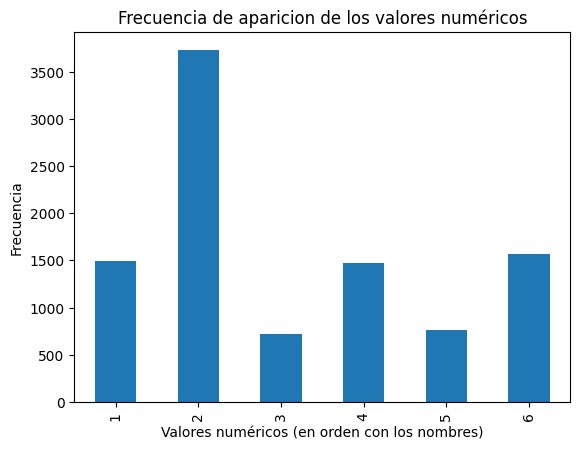

In [9]:
df_filtrado['TITULAR_NUM'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Valores numéricos (en orden con los nombres)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de aparicion de los valores numéricos')

plt.show()